In [1]:
import numpy as np
import sympy as sp
sp.init_printing(use_unicode=True)
wr = sp.Symbol('\omega_r')
wq = sp.Symbol('\omega_q')
g = sp.Symbol('g', real=True)
alpha = sp.Symbol('alpha')
Delta = sp.Symbol('Delta', real=True)

In [2]:
from sympy.physics.quantum import pauli, Dagger
sx = pauli.SigmaX()
sy = pauli.SigmaY()
sz = pauli.SigmaZ()
splus = pauli.SigmaPlus()
sminus = pauli.SigmaMinus()

In [3]:
from sympy.physics.quantum.boson import BosonOp
a = BosonOp('a')

In [5]:
H0 = wr*Dagger(a)*a - (1/2)*wq*sz; 
H2 = g*(Dagger(a)*sminus + a*splus); 
HJC = H0 + H2; HJC

In [6]:
S1 = alpha*Dagger(a)*sminus - sp.conjugate(alpha) * a * splus; S1

In [7]:
from sympy.physics.quantum import Commutator
from sympy.physics.quantum.operatorordering import normal_ordered_form
pauli.qsimplify_pauli(normal_ordered_form(Commutator(H0,S1).expand(commutator='True').simplify().expand()))

This expression should equal $-H2$ above so that $\alpha = -g/\Delta^2$, where $\Delta = \omega_r-\omega_q$. Let's substitute that value back in for $\alpha$.

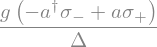

In [8]:
S1soln = S1.subs(alpha, -g/Delta).factor(); S1soln

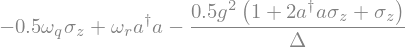

In [9]:
Heff = H0 + 0.5*pauli.qsimplify_pauli(normal_ordered_form(Commutator(H2, S1soln).doit().expand())).simplify(); Heff

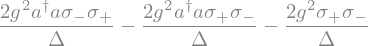

In [10]:
normal_ordered_form(Commutator(H2, S1soln).expand(commutator=True).doit().expand())

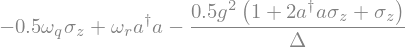

In [11]:
Heff

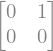

In [12]:
from sympy.physics.quantum import represent
represent(splus)

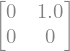

In [13]:
represent(0.5*(sx+1j*sy))

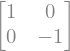

In [14]:
represent(sz)

In [15]:
Commutator(sminus, sz).doit()

In [16]:
(sminus*sz).simplify()

# Two coupled qubits

In [22]:
import numpy as np
import sympy as sp
sp.init_printing(use_unicode=True)
wr = sp.Symbol('\omega_r')
wq1 = sp.Symbol('\omega_{q1}')
wq2 = sp.Symbol('\omega_{q2}')
g1 = sp.Symbol('g_1', real=True)
g2 = sp.Symbol('g_2', real=True)
Delta1 = sp.Symbol('Delta_1', real=True)
Delta2 = sp.Symbol('Delta_2', real=True)
from sympy.physics.quantum import pauli, Dagger, Commutator, TensorProduct
from sympy.physics.quantum.operatorordering import normal_ordered_form
sx1 = pauli.SigmaX('1')
sy1 = pauli.SigmaY('1')
sz1 = pauli.SigmaZ('1')
splus1 = pauli.SigmaPlus('1')
sminus1 = pauli.SigmaMinus('1')
sx2 = pauli.SigmaX('2')
sy2 = pauli.SigmaY('2')
sz2 = pauli.SigmaZ('2')
splus2 = pauli.SigmaPlus('2')
sminus2 = pauli.SigmaMinus('2')

In [23]:
from sympy.physics.quantum.boson import BosonOp
a = BosonOp('a')

Now the Jaynes-Cummings Hamiltonian for two qubit coupled through a resonators is

In [24]:
Hzero2 = wr*Dagger(a)*a - (1/2)*wq1*sz1 - (1/2)*wq2*sz2; Hzero2

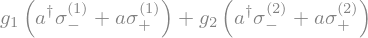

In [25]:
Htwo2 = g1*(Dagger(a)*sminus1 + a*splus1) + g2*(Dagger(a)*sminus2 + a*splus2); Htwo2

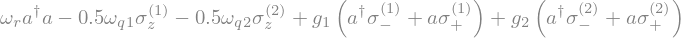

In [26]:
HJC2 = Hzero2 + Htwo2; HJC2

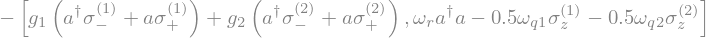

In [27]:
# let's find eta as from the paper mentioned in the Textbook
eta = Commutator(Hzero2, Htwo2); eta

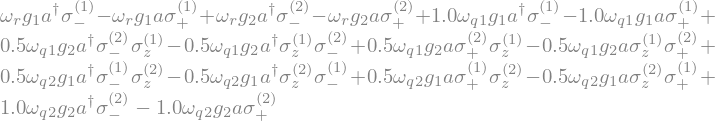

In [28]:
pauli.qsimplify_pauli(normal_ordered_form(eta.doit().expand())).simplify()

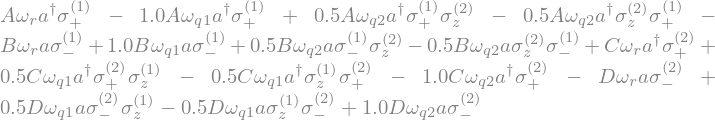

In [63]:
from sympy import symbols
A, B, C, D = symbols('A B C D')
eta = A*Dagger(a)*splus1 + B*a*sminus1 + C*Dagger(a)*splus2 + D*a*sminus2
pauli.qsimplify_pauli(normal_ordered_form(Commutator(Hzero2, eta).doit().expand()))

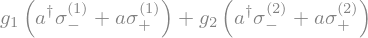

In [64]:
Htwo2

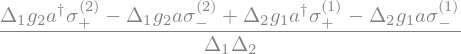

In [65]:
S1 = eta.subs(A, g1/Delta1)
S1 = S1.subs(B, -g1/Delta1)
S1 = S1.subs(C, g2/Delta2)
S1 = S1.subs(D, -g2/Delta2); 
S1 = S1.factor(); S1

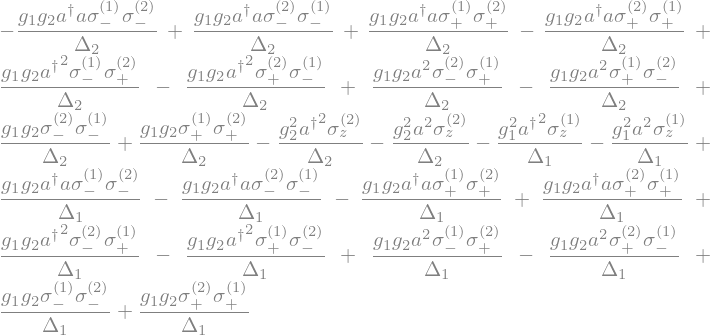

In [66]:
pauli.qsimplify_pauli(normal_ordered_form(Commutator(Htwo2, S1).doit().expand())).simplify()

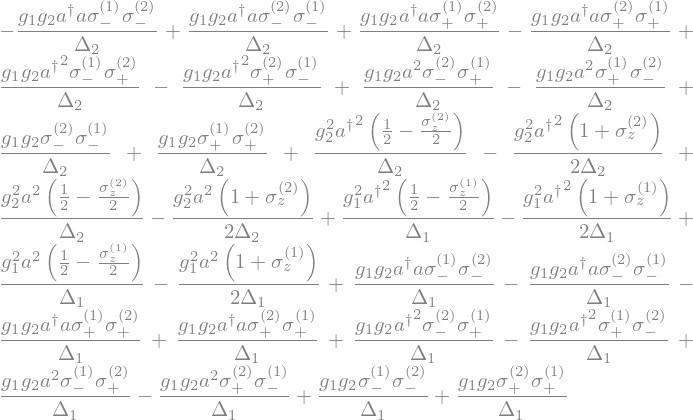

In [71]:
pauli.qsimplify_pauli(normal_ordered_form(Commutator(Htwo2, S1).expand().doit().expand())).factor()

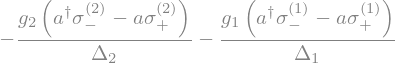

In [35]:
S1two = - (g1/Delta1)*(Dagger(a)*sminus1 - a*splus1) - (g2/Delta2)*(Dagger(a)*sminus2 - a*splus2); S1two

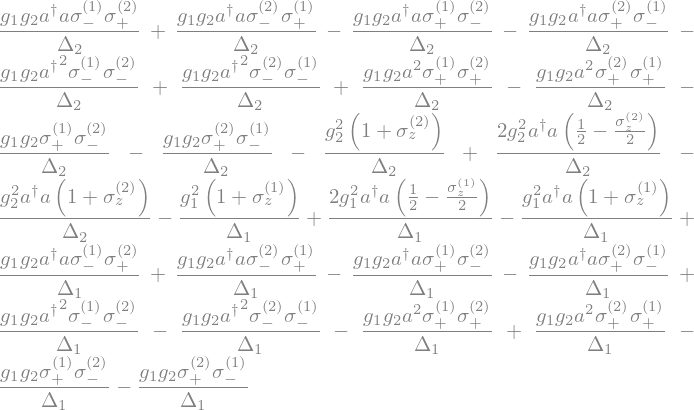

In [22]:
smp1 = pauli.qsimplify_pauli(normal_ordered_form(Commutator(Htwo2, S1two).doit().expand())); smp1

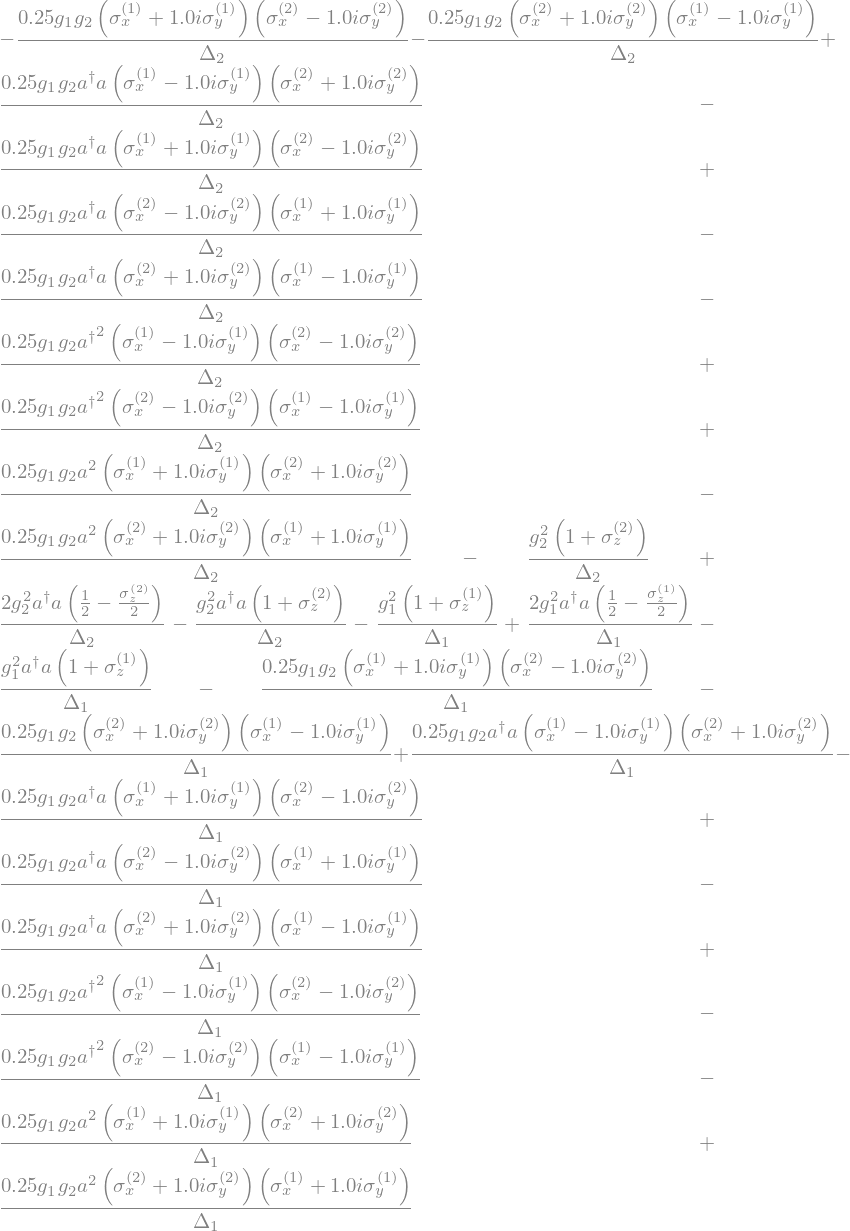

In [23]:
smp2 = smp1.subs(splus1, 0.5*(sx1+1j*sy1)); 
smp2 = smp2.subs(sminus1, 0.5*(sx1-1j*sy1)); 
smp2 = smp2.subs(splus2, 0.5*(sx2+1j*sy2)); 
smp2 = smp2.subs(sminus2, 0.5*(sx2-1j*sy2)); smp2

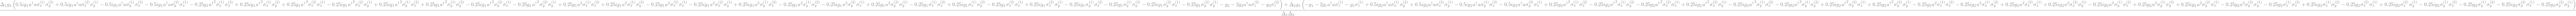

In [43]:
pauli.qsimplify_pauli(normal_ordered_form(smp2.expand())).simplify().factor()